# Task2: Stock Market Prediction (LGMVIP)

### By: K . Pravalya

In [1]:
#importing required libraries
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('stock.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [6]:
df.shape

(2035, 8)

In [28]:
df1=df.reset_index()['High']

In [29]:
df1.head()

0    235.95
1    236.80
2    240.00
3    236.75
4    239.20
Name: High, dtype: float64

In [30]:
df1.shape

(2035,)

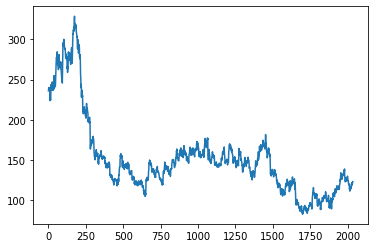

In [31]:
from matplotlib import pyplot as plt
plt.plot(df1)

In [32]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [33]:
df1

array([[0.62268754],
       [0.62614353],
       [0.6391543 ],
       ...,
       [0.15917869],
       [0.15938199],
       [0.16344786]])

In [34]:

train_size=int(len(df1)*0.65)
test_size=len(df1)-train_size
train,test=df1[0:train_size,:],df1[train_size:len(df1),:1]

In [35]:
len(train)

1322

In [36]:
len(test)

713

In [37]:

def create(data,time=1):
    dataX,dataY=[],[]
    for i in range(len(data)-time-1):
        a=data[i:(i+time),0]
        dataX.append(a)
        dataY.append(data[i + time,0])
    return np.array(dataX),np.array(dataY)

In [38]:
time=100
X_train,y_train=create(train,time)
X_test,y_test=create(test,time)

In [39]:
X_train.shape

(1221, 100)

In [40]:
y_train.shape

(1221,)

In [41]:

X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [42]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM 

In [43]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 11s 272ms/step - loss: 0.0309 - val_loss: 0.0033
Epoch 2/100
20/20 [==============================] - 4s 200ms/step - loss: 0.0035 - val_loss: 0.0016
Epoch 3/100
20/20 [==============================] - 4s 204ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 4/100
20/20 [==============================] - 4s 207ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 5/100
20/20 [==============================] - 4s 200ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 6/100
20/20 [==============================] - 4s 202ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 7/100
20/20 [==============================] - 4s 203ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 8/100
20/20 [==============================] - 4s 207ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 9/100
20/20 [==============================] - 4s 206ms/step - loss: 0.0018 - val_loss: 8.8472e-04
Epoch 10/100
20/20 [==============================] - 8s 394ms/step - loss: 0.0014 - v

In [47]:

train_p=model.predict(X_train)
test_p=model.predict(X_test)

In [48]:
 
train_p=scaler.inverse_transform(train_p)
test_p=scaler.inverse_transform(test_p)

In [49]:

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,test_p))

119.65061701491676

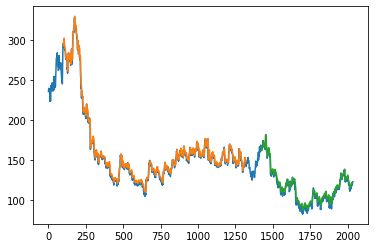

In [50]:

look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_p)+look_back, :] = train_p
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_p)+(look_back*2)+1:len(df1)-1, :] = test_p
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()